***1.2.1 Пример***
Задача: Итак, начальные условия задачи представляют собой следующий граф с расстояниями между ребрами:

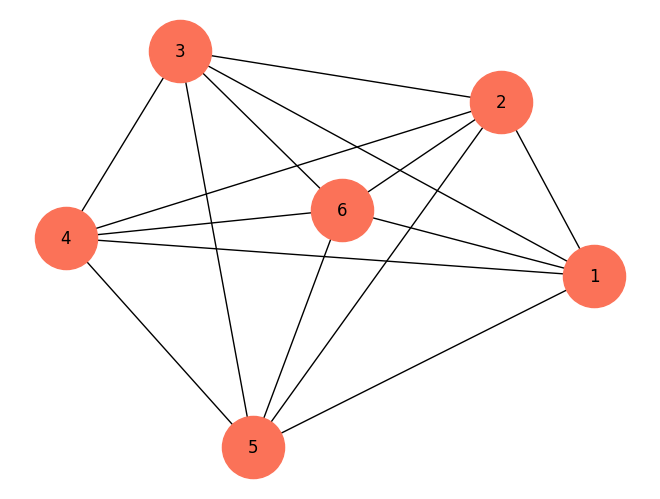

In [1]:
import networkx as nx
from math import e
distances =[(1, 2, 20),
            (1, 3, 48),
            (1, 4, 42),
            (1, 5, 33),
            (1, 6, 21),
            (2, 3, 26),
            (2, 4, 38),
            (2, 5, 42),
            (2, 6, 17),
            (3, 4, 22),
            (3, 5, 43),
            (3, 6, 21),
            (4, 5, 27),
            (4, 6, 22),
            (5, 6, 26)] # длины ребер

V = [1, 4, 5, 2, 6, 3, 1] # последовательность прохождения маршрута
Z = [(3, 4),
     (4, 6),
     (5, 2),
     (6, 2)] # nocnedo6amensnocms sanen Gepuun

P = [49, 54, 43, 54] # случайные числа, выпавшие в процессе счета

T = 100 # начальная температура
# Запишем функции вероятности и изменения температуры:
# функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta/T)

# функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT
# Построим граф по заданным вершинам, как в начальном условии:
graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # Добавление весов ребер

# отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Задание: Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.


In [1]:
def evoStep(X,Y,Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X, Y, Z
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]


    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]

    Y[3] = oldY[sortedId[1]]

    return X, Y
def qZ(x,y):
    return (x-3 * y+1) / (3*x**2 + 3*y**2 + 1)
def qSumZ(Z):
    return sum(Z)

def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])

    return sortedId
def evoSteps(X, Y, stepsNum=4):
    results=[]
    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])
    return X, Y, results
def qZ(x,y):
    return (x - 3*y) / (2*x**2 + 2*y**2 + 1)

X = [-1, 0, 2, 3]
Y = [0, 1, -2, 2]

results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')

qualityArrZ = []

for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z:    {max(qualityArrZ)}')

max_1_step: -0.9738562091503267
max_2_step: 0.7748068924539511
max_3_step: 0.9251336898395722
max_4_step: 1.7290552584670231
max Z:    0.47058823529411764


лучший выбранный маршрут: [1, 2, 5, 4, 3, 6, 1]
длина лучшего выбранного маршрута: 139
длины всех рассмотренных маршрутов: [177, 148, 157, 139, 154]


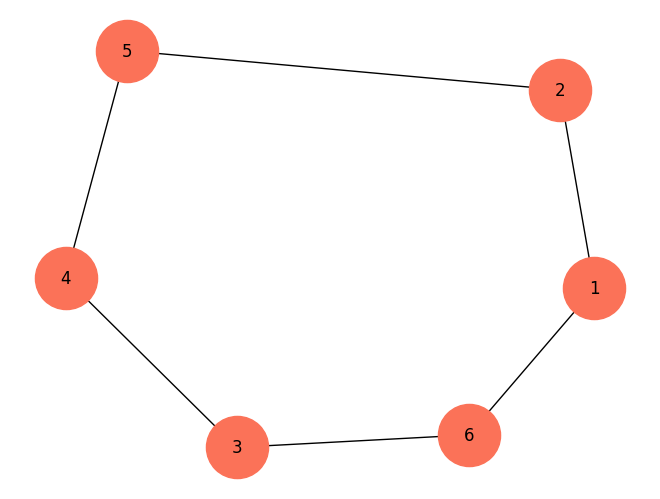

In [5]:
import networkx as nx
from math import e
def probability(delta, T):
    return 100 * e ** (-delta/T)
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i+1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i+1]:
                newDistances.append(distance)

    graph = nx.Graph() # создание пустого графа

    graph.add_weighted_edges_from(newDistances) # добавление весов ребер
    # отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)
# функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1)
                    for item in distances])
# вычисление длины маршрута
def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))
    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV
# перестановки в пути
def routeReplacement(V,Z):
    for z in Z:
        V = routeReplacement(V,z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длин пути
    arrSum = [sumLength] # массив сумм длин

    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # Длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница длин старого и нового маршрута

        # в случае если разница между длинами больше нуля, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) # подсчет вероятности

            # если заданная вероятность попадает в интервал от 0 до р, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T) # вычисление температуры
    return V, arrSum

distances =[(1, 2, 19),
            (1, 3, 39),
            (1, 4, 35),
            (1, 5, 26),
            (1, 6, 18),
            (2, 3, 26),
            (2, 4, 33),
            (2, 5, 37),
            (2, 6, 14),
            (3, 4, 22),
            (3, 5, 41),
            (3, 6, 21),
            (4, 5, 22),
            (4, 6, 19),
            (5, 6, 24)] # длины ребер

V = [1, 4, 2, 3, 5, 6, 1] # последовательность прохождения маршрута
Z = [(5, 2),
     (4, 5),
     (2, 3),
     (3, 4)] # nocnedo6amensnocms sanen Gepuun

P = [88, 54, 24, 64] # случайные числа, выпавшие в процессе счета

T = 100 # начальная температура
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'лучший выбранный маршрут: {bestRoute}')
print(f'длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)